In [1]:
# Uistíme sa, že máme všetky potrebné dáta
!mkdir -p data
!wget -nc -O data/iris.csv https://raw.githubusercontent.com/michalgregor/ai1_notebooks/master/data/iris.csv

File ‘data/iris.csv’ already there; not retrieving.


# Balíček ``pandas``

Pri práci s dátami vie byť veľmi užitočný balíček ```pandas```. Umožňuje načítať dáta z rôznych typov súborov, z databáz, komfortným spôsobom s nimi pracovať, vypočítať z nich základné štatistické ukazovatele, rýchlo zobraziť jednoduché grafy a pod.

## Dátové rámce

Základným dátovým typom v balíčku ``pandas`` sú dátové rámce – v podstate sú to tabuľky, kde stĺpce obsahujú určité pomenované atribúty a riadky zodpovedajú jednotlivým dátovým záznamom. Ak máme určité dáta s atribútmi ``attr1, attr2, attr3``, vieme dátový rámec vytvoriť nasledovným spôsobom:

In [2]:
import pandas as pd

df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]], columns=["attr1", "attr2", "attr3"])
print(df)

   attr1  attr2  attr3
0      1      2      3
1      4      5      6
2      7      8      9


Z dátového rámca vieme ľahko vybrať niektoré stĺpce:

In [3]:
a = df["attr1"]
print(a)

0    1
1    4
2    7
Name: attr1, dtype: int64


In [4]:
b = df[["attr2", "attr3"]]
print('df[["attr2", "attr3"]] = \n{}'.format(b))

df[["attr2", "attr3"]] = 
   attr2  attr3
0      2      3
1      5      6
2      8      9


In [5]:
c = df.attr1
print(c)

0    1
1    4
2    7
Name: attr1, dtype: int64


Nové stĺpce je možné doplniť tak, že ich adresujeme a priradíme do nich nejaký výraz:

In [6]:
df["attr4"] = df["attr2"] + df["attr3"]
print(df)

   attr1  attr2  attr3  attr4
0      1      2      3      5
1      4      5      6     11
2      7      8      9     17


Zoznam všetkých stĺpcov získame pomocou:

In [7]:
cols = df.columns
print(cols)

Index(['attr1', 'attr2', 'attr3', 'attr4'], dtype='object')


Ak chceme vybrať stĺpec podľa číselného indexu:

In [8]:
a = df.iloc[:, 1]
print(a)

0    2
1    5
2    8
Name: attr2, dtype: int64


Alebo zvoliť len niektoré riadky:

In [9]:
a = df.iloc[1:3]
print(a)

   attr1  attr2  attr3  attr4
1      4      5      6     11
2      7      8      9     17


Použitím vlastnosti ``.values`` vieme z dátového rámca získať dáta v podobe klasického ``numpy`` poľa:

In [10]:
print(df.values)

[[ 1  2  3  5]
 [ 4  5  6 11]
 [ 7  8  9 17]]


## Načítanie dát z csv súboru

CSV súbory sú jednoduché textové súbory obsahujúce dáta oddelené čiarkami, napr.:
```
5.1,3.5,1.4,0.2,setosa
7.0,3.2,4.7,1.4,versicolor
6.7,3.1,5.6,2.4,virginica
```

V balíčku ```pandas``` sa dá na ich načítanie použiť funkcia ```read_csv```:

In [11]:
import pandas as pd
df = pd.read_csv('data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Táto funkcia má zopár parametrov, ktoré treba správne nastaviť – napr. nastaviť ``sep=';'`` ak nie sú dáta oddelené čiarkami, ale bodkočiarkami alebo nastaviť ``header=False`` ak ``pandas`` nedeteguje správne, že CSV súbor nemá hlavičku.

## Prekódovanie kategorického atribútu na číselný

Niektoré metódy nevedia pracovať s kategorickými atribútmi (takými, ktoré nadobúdajú určitý konečný počet slovných hodnôt). V tom prípade treba také atribúty prekódovať na číselné. Je to možné urobiť napríklad pomocou triedy ``OrdinalEncoder``  z balíčka ``sklearn``:

In [12]:
from sklearn.preprocessing import OrdinalEncoder
ordenc = OrdinalEncoder()

# funkcia fit_transform nastaví parametre transformátora
# na základe dát a zároveň navrátiť transformované dáta
df['species_num'] = ordenc.fit_transform(df[['species']])

# Z výsledku si pre kontrolu zobrazíme zopár vzoriek
df[["species", "species_num"]].iloc[[0, 1, 50, 80, 100, 101]]

,species,species_num
0,setosa,0.0
1,setosa,0.0
50,versicolor,1.0
80,versicolor,1.0
100,virginica,2.0
101,virginica,2.0


## Jednoduché štatistiky a grafy

Balíček ```pandas``` umožňuje zobraziť aj jednoduché štatistiky a grafy. Keby sme napríklad chceli vedieť základné informácie o rozdelení hodnôt v prvom stĺpci, môžeme použiť funkciu ```describe```.

In [13]:
print(df.iloc[:, 0].describe())

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64


### Boxplot

Alebo si môžeme zobraziť ``boxplot``, ktorý nám dá podobnú informáciu v grafickej podobe:

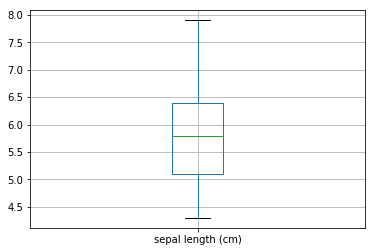

In [14]:
df.boxplot(column=df.columns[0])

### Porovnanie boxplot-ov medzi triedami

Ak chceme porovnať boxplot-y jednotlivých tried:

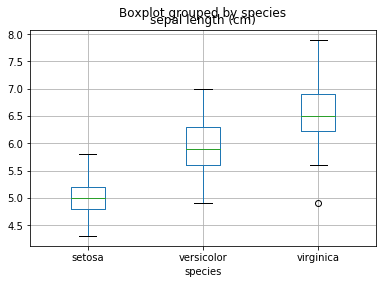

In [15]:
df.boxplot(column=df.columns[0], by='species')

### Histogramy

Obdobne jednoduché je zobraziť histogram hodnôt zo stĺpca:

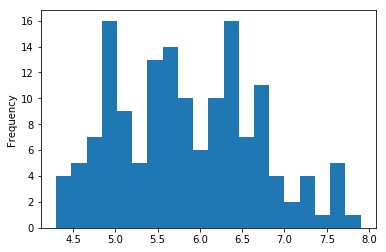

In [16]:
df[df.columns[0]].plot(bins=20, kind='hist')

### Porovnanie histogramov medzi triedami

Ak chceme porovnať rozdelenie hodnôt naprieč triedami (```species```) môžeme použiť:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa20fa9f550>,
      dtype=object)

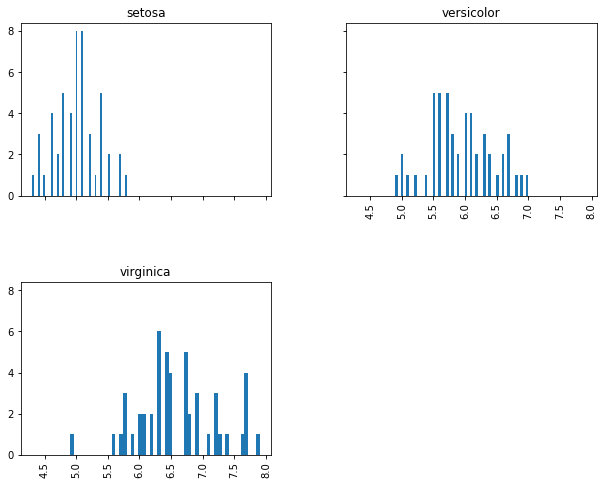

In [20]:
df.hist(column=df.columns[0], by='species', bins=50,
        sharex=True, sharey=True, figsize=[10, 8])

## Aplikácia ľubovoľnej funkcie na celý stĺpec

Vyššie sme ukázali ako je možné vytvoriť nový stĺpec.V zásade vieme na prvky existujúceho stĺpca aplikovať ľubovoľnú funkciu a výsledok uložiť ako nový stĺpec. Povedzme, že by sme chceli určiť aký počet znakov majú jednotlivé textové reťazce v stĺpci ```species``` v našej dátovej množine:

In [24]:
# transformácia
df["len"] = df["species"].map(lambda x: len(x))

# zobrazíme si niekoľko vzoriek
df["len"].iloc[[0, 1, 50, 80, 100, 101]]

0       6
1       6
50     10
80     10
100     9
101     9
Name: len, dtype: int64

## Hromadné porovnávanie a indexovanie prvkov

Podobne ako v poliach z balíčka ``numpy``, aj v dátových rámcoch je možné nájsť a indexovať záznamy, ktoré spĺňajú určitú podmienku. Napr. vyberieme len tie riadky, kde hodnota nultého stĺpca je väčšia než 5.

In [25]:
a = df[df.iloc[:, 0] > 5]
a.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_num,len
0,5.1,3.5,1.4,0.2,setosa,0.0,6
5,5.4,3.9,1.7,0.4,setosa,0.0,6
10,5.4,3.7,1.5,0.2,setosa,0.0,6
14,5.8,4.0,1.2,0.2,setosa,0.0,6
15,5.7,4.4,1.5,0.4,setosa,0.0,6
